<a href="https://colab.research.google.com/github/JY6299/Loan_Amount_Prediction/blob/main/Loan_Amount_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
URL = 'https://raw.githubusercontent.com/semasuka/Loan-amount-prediction-regression/refs/heads/main/datasets/train.csv'

df = pd.read_csv(URL)

df.head()
df.shape

(30000, 24)

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

,0
Gender,53
Income (USD),4576
Income Stability,1683
Type of Employment,7270
Current Loan Expenses (USD),172
Dependents,2493
Credit Score,1703
Has Active Credit Card,1566
Property Age,4850
Property Location,356


Since our response variable "Loan Sanction Amt" also has NaN. \\
Remove those accts

In [ ]:
df = df[~df['Loan Sanction Amount (USD)'].isnull()]
df = df.rename(columns={'Loan Sanction Amount (USD)':'Loan_amount'})

df.isnull().sum()[df.isnull().sum()>0]


,0
Gender,52
Income (USD),4493
Income Stability,1658
Type of Employment,7188
Current Loan Expenses (USD),167
Dependents,2446
Credit Score,1670
Has Active Credit Card,1546
Property Age,4760
Property Location,347


In [ ]:
df.shape

(29660, 24)

"Gender" Variable quite random, so we randomly replace NaN

In [ ]:
rand_gen = df['Gender'].dropna().unique()

df.loc[df['Gender'].isnull(),'Gender'] = np.random.choice(rand_gen)
df.isnull().sum()[df.isnull().sum()>0]

,0
Income (USD),4493
Income Stability,1658
Type of Employment,7188
Current Loan Expenses (USD),167
Dependents,2446
Credit Score,1670
Has Active Credit Card,1546
Property Age,4760
Property Location,347


In [ ]:
df.shape

(29660, 24)

"Income" usually have some extreme outliers. \\
Since building Linear Regression, better replace with MEDIAN and remove *outliers*

In [ ]:
import seaborn as sns
df.rename(columns={'Income (USD)':'Income'},inplace=True)
df['Income'].describe()
df['Income'] = df['Income'].fillna(df['Income'].median())

IQR = df['Income'].quantile(0.75) - df['Income'].quantile(0.25)
threshold = 1.5 * IQR + df['Income'].quantile(0.9)
print(threshold)

filter = (df['Income'] > threshold)
df = df.loc[~filter]
df.isnull().sum()[df.isnull().sum()>0]

5669.879000000001


,0
Income Stability,1633
Type of Employment,7036
Current Loan Expenses (USD),163
Dependents,2390
Credit Score,1635
Has Active Credit Card,1437
Property Age,4746
Property Location,336


(28894, 24)

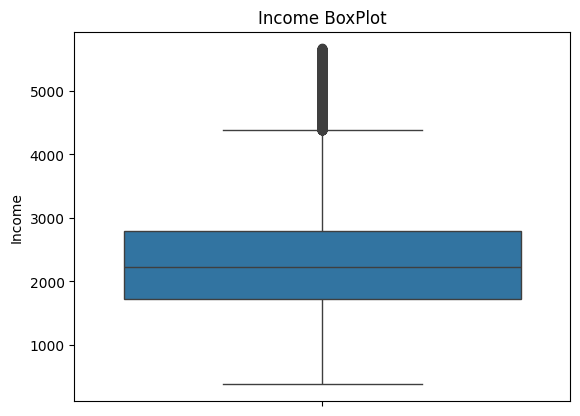

In [ ]:
sns.boxplot(df['Income'])
plt.title('Income BoxPlot')

df.shape

"Income Stability" doesn't have much info, only Low & High \\
 I will just drop it.


In [ ]:
df['Income Stability'].value_counts()

df = df.drop(columns='Income Stability')

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

,0
Type of Employment,7036
Current Loan Expenses (USD),163
Dependents,2390
Credit Score,1635
Has Active Credit Card,1437
Property Age,4746
Property Location,336


"Type of Employment" has many categories, not necessary to encode each. \\
Remove.

In [ ]:
df['Type of Employment'].value_counts()
df = df.drop(columns='Type of Employment')

In [ ]:
print(df.shape)
df.isnull().sum()[df.isnull().sum()>0]

(28894, 22)


,0
Current Loan Expenses (USD),163
Dependents,2390
Credit Score,1635
Has Active Credit Card,1437
Property Age,4746
Property Location,336


"Current Loan Expense" have some negative balance, which should be floored at 0.

(28730, 22)

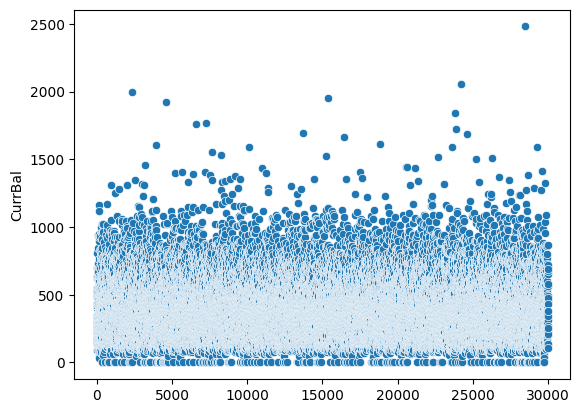

In [ ]:
df = df.rename(columns={'Current Loan Expenses (USD)':'CurrBal'})

df.loc[df['CurrBal']<0,'CurrBal']=0
filt=(df['CurrBal']<3500)
df = df.loc[filt]

sns.scatterplot(df['CurrBal'])
df.shape

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

,0
Dependents,2366
Credit Score,1622
Has Active Credit Card,1425
Property Age,4690
Property Location,333


"Dependent" major population has 1 dependent, so we fill NaN to 1. \\
4+ dependent all categorize into 4 as these have too less proportion.

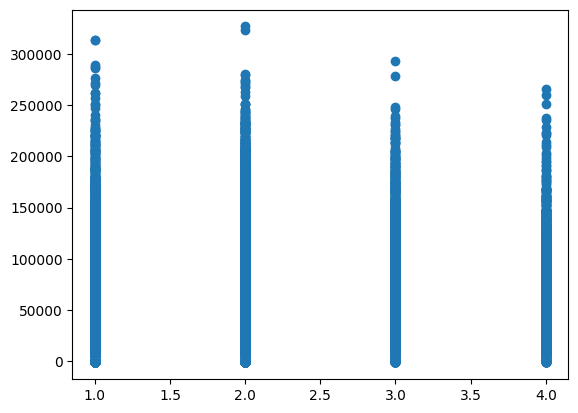

In [ ]:
df['Dependents'].value_counts()
df.loc[df['Dependents']>4,'Dependents']=4
df['Dependents'] = df['Dependents'].fillna(1)
plt.scatter(df['Dependents'],df['Loan_amount'])

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

,0
Credit Score,1622
Has Active Credit Card,1425
Property Age,4690
Property Location,333


"Credit Score" summary seems normal, and also normal to see missing in credit bureau. \\
Replace with MEAN is fine enough.

In [ ]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].mean())
df.isnull().sum()[df.isnull().sum()>0]

,0
Has Active Credit Card,1425
Property Age,4690
Property Location,333


"Has Active Credit Card" equally distributed. \\
Randomly select to fill NaN

In [ ]:
#df['Has Active Credit Card'].value_counts()
df = df.rename(columns={'Has Active Credit Card':'Credit_Cards_Use'})
rand_lst = df['Credit_Cards_Use'].dropna().unique()

df.loc[df['Credit_Cards_Use'].isnull(),'Credit_Cards_Use']=np.random.choice(rand_lst)
df.isnull().sum()[df.isnull().sum()>0]

,0
Property Age,4690
Property Location,333


'Property Age' replace with MEAN value. \\
'Location' can be dropped as it has no info for model build.

In [ ]:
df['Property Age'].describe()
df['Property Age'] = df['Property Age'].fillna(df['Property Age'].mean())
df = df.drop(columns='Property Location')


KeyError: "['Property Location'] not found in axis"

In [ ]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28730 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                28730 non-null  object 
 1   Name                       28730 non-null  object 
 2   Gender                     28730 non-null  object 
 3   Age                        28730 non-null  int64  
 4   Income                     28730 non-null  float64
 5   Profession                 28730 non-null  object 
 6   Location                   28730 non-null  object 
 7   Loan Amount Request (USD)  28730 non-null  float64
 8   CurrBal                    28730 non-null  float64
 9   Expense Type 1             28730 non-null  object 
 10  Expense Type 2             28730 non-null  object 
 11  Dependents                 28730 non-null  float64
 12  Credit Score               28730 non-null  float64
 13  No. of Defaults            28730 non-null  int64  


ID Columns are not necessarily needed for model build but for performance monitoring \\
Creating a new df to drop ID related columns. Leave old df for preference

In [ ]:
df1 = df.drop(columns=['Customer ID', 'Name', 'Location','Property ID','Expense Type 1','Expense Type 2'])

In [ ]:
df1.head()

,Gender,Age,Income,Profession,Loan Amount Request (USD),CurrBal,Dependents,Credit Score,No. of Defaults,Credit_Cards_Use,Property Age,Property Type,Co-Applicant,Property Price,Loan_amount
0,F,56,1933.05,Working,72809.58,241.08,3.0,809.44,0,Active,1933.050000,4,1,119933.46,54607.18
1,M,32,4952.91,Working,46837.47,495.81,1.0,780.40,0,Unpossessed,4952.910000,2,1,54791.00,37469.98
2,F,65,988.19,Pensioner,45593.04,171.95,1.0,833.15,0,Unpossessed,988.190000,2,0,72440.58,36474.43
3,F,65,2223.30,Pensioner,80057.92,298.54,2.0,832.70,1,Unpossessed,2388.850202,2,1,121441.51,56040.54
4,F,31,2614.77,Working,113858.89,491.41,1.0,745.55,1,Active,2614.770000,4,1,208567.91,74008.28


Feature Engineering, to transfer character variables to discrete variables